# TO DO ⚓


## 상권 정보를 통해 퍼포먼스 반환하는 모델


## 트리기반 모델에 SHAP모델을 이용해서, 어느 변수가 영향을 많이 끼쳤는지 확인



In [32]:
!sudo apt-get install -y fonts-nanum
!sudo fc-cache -fv
!rm ~/.cache/matplotlib -rf

Reading package lists... Done
Building dependency tree       
Reading state information... Done
fonts-nanum is already the newest version (20180306-3).
The following package was automatically installed and is no longer required:
  libnvidia-common-510
Use 'sudo apt autoremove' to remove it.
0 upgraded, 0 newly installed, 0 to remove and 21 not upgraded.
/usr/share/fonts: caching, new cache contents: 0 fonts, 1 dirs
/usr/share/fonts/truetype: caching, new cache contents: 0 fonts, 3 dirs
/usr/share/fonts/truetype/humor-sans: caching, new cache contents: 1 fonts, 0 dirs
/usr/share/fonts/truetype/liberation: caching, new cache contents: 16 fonts, 0 dirs
/usr/share/fonts/truetype/nanum: caching, new cache contents: 10 fonts, 0 dirs
/usr/local/share/fonts: caching, new cache contents: 0 fonts, 0 dirs
/root/.local/share/fonts: skipping, no such directory
/root/.fonts: skipping, no such directory
/usr/share/fonts/truetype: skipping, looped directory detected
/usr/share/fonts/truetype/humor-san

In [1]:
import matplotlib.pyplot as plt

plt.rc('font', family='NanumBarunGothic')

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [3]:
import pandas as pd
import numpy as np

## 데이터 전처리 

In [4]:
df = pd.read_csv('/content/drive/MyDrive/출발 드림팀/data/Task1_modeling/real_final.csv',encoding='cp949')

In [5]:
df

,Unnamed: 0,기준_년_코드,기준_분기_코드,상권_코드,상권_코드_명,행정동_코드_명_x,상권_변화_지표,상권_변화_지표_명,서비스_업종_코드,서비스_업종_코드_명,...,상권변화지표_점수,유사업종_수_점수,y_target,엑스좌표_값,와이좌표_값,행정동_코드,시군구_코드,공시지가(원/㎡),동별(1),전체평균연령
0,0,2020,4,2110346,4.19민주묘지역 2번,우이동,LL,다이나믹,CS100003,일식음식점,...,3,4,13,35.272517,129.869691,11090740.0,11090,2537032,합계,48.3
1,1,2022,2,2110346,4.19민주묘지역 2번,우이동,LL,다이나믹,CS100009,호프-간이주점,...,3,2,11,35.272517,129.869691,11090740.0,11090,2537032,합계,48.3
2,2,2022,2,2110346,4.19민주묘지역 2번,우이동,LL,다이나믹,CS100010,커피-음료,...,3,2,8,35.272517,129.869691,11090740.0,11090,2537032,합계,48.3
3,3,2022,3,2110346,4.19민주묘지역 2번,우이동,LL,다이나믹,CS100001,한식음식점,...,3,1,9,35.272517,129.869691,11090740.0,11090,2537032,합계,48.3
4,4,2022,3,2110346,4.19민주묘지역 2번,우이동,LL,다이나믹,CS100003,일식음식점,...,3,4,13,35.272517,129.869691,11090740.0,11090,2537032,합계,48.3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
89495,89495,2022,1,2110061,효창동주민센터,효창동,HH,정체,CS100008,분식전문점,...,2,2,10,35.233225,129.737190,11030580.0,11030,5395758,합계,42.3
89496,89496,2022,1,2110061,효창동주민센터,효창동,HH,정체,CS100007,치킨전문점,...,2,2,10,35.233225,129.737190,11030580.0,11030,5395758,합계,42.3
89497,89497,2022,1,2110061,효창동주민센터,효창동,HH,정체,CS100005,제과점,...,2,2,8,35.233225,129.737190,11030580.0,11030,5395758,합계,42.3
89498,89498,2022,1,2110061,효창동주민센터,효창동,HH,정체,CS100001,한식음식점,...,2,1,7,35.233225,129.737190,11030580.0,11030,5395758,합계,42.3


#결측치 확인 

In [6]:
df.isnull().sum()

Unnamed: 0           0
기준_년_코드              0
기준_분기_코드             0
상권_코드                0
상권_코드_명              0
행정동_코드_명_x           0
상권_변화_지표             0
상권_변화_지표_명           0
서비스_업종_코드            0
서비스_업종_코드_명          0
분기당_매출_금액            0
분기당_매출_건수            0
분기별_거래당_매출금액         0
주중_매출_비율             0
주말_매출_비율             0
점포_수                 0
유사_업종_점포_수           0
개업_율                 0
개업_점포_수              0
폐업_률                 0
폐업_점포_수              0
프랜차이즈_점포_수           0
총_생활인구_수             0
월_평균_소득_금액           0
소득_구간_코드             0
지출_총금액               0
총_직장_인구_수            0
집객시설_수               0
분기별_거래당_매출금액_점수      0
상권변화지표_점수            0
유사업종_수_점수            0
y_target             0
엑스좌표_값               0
와이좌표_값               0
행정동_코드             160
시군구_코드               0
공시지가(원/㎡)            0
동별(1)                0
전체평균연령               0
dtype: int64

In [7]:
df.rename(columns={
    'y_target':'target',
    '엑스좌표_값' : '위도',
    '와이좌표_값' : '경도',
    '공시지가(원/㎡)': '평당_공시지가',
    '행정동_코드_x' : '행정동_코드',
    '행정동_코드_명_x' : '행정동_코드_명',
    '상권_변화_지표_x' : '상권_변화_지표',
    '상권_변화_지표_명_x': '상권_변화_지표_명',
    '전체평균연령' : '행정동별_평균연령'
     },inplace=True)

In [8]:
df['기준_년_코드'].value_counts()

2020    33413
2021    32410
2022    23677
Name: 기준_년_코드, dtype: int64

In [9]:
cols = df.columns.tolist()
cols

['Unnamed: 0',
 '기준_년_코드',
 '기준_분기_코드',
 '상권_코드',
 '상권_코드_명',
 '행정동_코드_명',
 '상권_변화_지표',
 '상권_변화_지표_명',
 '서비스_업종_코드',
 '서비스_업종_코드_명',
 '분기당_매출_금액',
 '분기당_매출_건수',
 '분기별_거래당_매출금액',
 '주중_매출_비율',
 '주말_매출_비율',
 '점포_수',
 '유사_업종_점포_수',
 '개업_율',
 '개업_점포_수',
 '폐업_률',
 '폐업_점포_수',
 '프랜차이즈_점포_수',
 '총_생활인구_수',
 '월_평균_소득_금액',
 '소득_구간_코드',
 '지출_총금액',
 '총_직장_인구_수',
 '집객시설_수',
 '분기별_거래당_매출금액_점수',
 '상권변화지표_점수',
 '유사업종_수_점수',
 'target',
 '위도',
 '경도',
 '행정동_코드',
 '시군구_코드',
 '평당_공시지가',
 '동별(1)',
 '행정동별_평균연령']

# 임의 모델링

## 맞추어야 하는 Y값 : 매출

Y target 만드는 데 쓰인 변수 : \
[상권변화지표_점수 분기당_매출_금액,분기별_거래당_매출금액_점수 , 분기당_매출_건수, 분기별_거래당_매출금액, 유사_업종_점포_수 , 상권_변화_지표_명, 상권변화지표_점수 , 프랜차이즈_점포_수,','유사업종_수_점수','점포'] 

---



In [10]:
df.drop(columns=['Unnamed: 0',
                 '상권_코드',
                 '상권_코드_명',
                 '분기당_매출_금액',
                 '분기별_거래당_매출금액',
                 '분기당_매출_건수',
                 '유사_업종_점포_수',
                 '상권_변화_지표',
                  '상권_변화_지표_명',
                 '행정동_코드',
                 '행정동_코드_명',
                 '서비스_업종_코드',
                 '상권_변화_지표',
                 '상권변화지표_점수',
                 '프랜차이즈_점포_수',
                '분기별_거래당_매출금액_점수',
                 '동별(1)',
                 '월_평균_소득_금액',
                 '위도',
                 '경도',
                 '유사업종_수_점수',
                 '점포_수'],inplace=True)

In [11]:
df.columns

Index(['기준_년_코드', '기준_분기_코드', '서비스_업종_코드_명', '주중_매출_비율', '주말_매출_비율', '개업_율',
       '개업_점포_수', '폐업_률', '폐업_점포_수', '총_생활인구_수', '소득_구간_코드', '지출_총금액',
       '총_직장_인구_수', '집객시설_수', 'target', '시군구_코드', '평당_공시지가', '행정동별_평균연령'],
      dtype='object')

In [12]:
cat_columns = ['기준_년_코드', '기준_분기_코드', '서비스_업종_코드_명']

In [13]:
df.columns

Index(['기준_년_코드', '기준_분기_코드', '서비스_업종_코드_명', '주중_매출_비율', '주말_매출_비율', '개업_율',
       '개업_점포_수', '폐업_률', '폐업_점포_수', '총_생활인구_수', '소득_구간_코드', '지출_총금액',
       '총_직장_인구_수', '집객시설_수', 'target', '시군구_코드', '평당_공시지가', '행정동별_평균연령'],
      dtype='object')

## Standard Scaling

In [14]:
standard_scale_column = df.columns.tolist()
standard_scale_column = list(set(standard_scale_column) - set(cat_columns))
standard_scale_column.remove('target')
standard_scale_column

['주말_매출_비율',
 '시군구_코드',
 '행정동별_평균연령',
 '주중_매출_비율',
 '소득_구간_코드',
 '총_직장_인구_수',
 '평당_공시지가',
 '폐업_점포_수',
 '지출_총금액',
 '개업_점포_수',
 '개업_율',
 '총_생활인구_수',
 '폐업_률',
 '집객시설_수']

In [15]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
df[standard_scale_column] = scaler.fit_transform(df[standard_scale_column])

## 범주형 변수 지정 

=> 기준 년 , 분기 , 코드명, 상권변화지표명,업종코드명,



빠진거 남녀 비율, 평균연령대, 임대료  + 총매출 

## 원핫인코딩

In [16]:
df = pd.get_dummies(df, columns = cat_columns)

In [17]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 89500 entries, 0 to 89499
Data columns (total 32 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   주중_매출_비율             89500 non-null  float64
 1   주말_매출_비율             89500 non-null  float64
 2   개업_율                 89500 non-null  float64
 3   개업_점포_수              89500 non-null  float64
 4   폐업_률                 89500 non-null  float64
 5   폐업_점포_수              89500 non-null  float64
 6   총_생활인구_수             89500 non-null  float64
 7   소득_구간_코드             89500 non-null  float64
 8   지출_총금액               89500 non-null  float64
 9   총_직장_인구_수            89500 non-null  float64
 10  집객시설_수               89500 non-null  float64
 11  target               89500 non-null  int64  
 12  시군구_코드               89500 non-null  float64
 13  평당_공시지가              89500 non-null  float64
 14  행정동별_평균연령            89500 non-null  float64
 15  기준_년_코드_2020         89500 non-null 

In [18]:
df = df.mask((df > 1e300) | (df < -1e300), np.nan)

In [19]:
df.dropna(inplace=True)

In [20]:
from sklearn.model_selection import train_test_split

X = df.drop(columns=['target'])
Y = df['target']


In [21]:
df.columns

Index(['주중_매출_비율', '주말_매출_비율', '개업_율', '개업_점포_수', '폐업_률', '폐업_점포_수',
       '총_생활인구_수', '소득_구간_코드', '지출_총금액', '총_직장_인구_수', '집객시설_수', 'target',
       '시군구_코드', '평당_공시지가', '행정동별_평균연령', '기준_년_코드_2020', '기준_년_코드_2021',
       '기준_년_코드_2022', '기준_분기_코드_1', '기준_분기_코드_2', '기준_분기_코드_3', '기준_분기_코드_4',
       '서비스_업종_코드_명_분식전문점', '서비스_업종_코드_명_양식음식점', '서비스_업종_코드_명_일식음식점',
       '서비스_업종_코드_명_제과점', '서비스_업종_코드_명_중식음식점', '서비스_업종_코드_명_치킨전문점',
       '서비스_업종_코드_명_커피-음료', '서비스_업종_코드_명_패스트푸드점', '서비스_업종_코드_명_한식음식점',
       '서비스_업종_코드_명_호프-간이주점'],
      dtype='object')

## train/test split

In [22]:
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=34)

# Modeling 

In [23]:
df['target'].describe()

count    89500.000000
mean         9.802637
std          2.688342
min          4.000000
25%          8.000000
50%         10.000000
75%         12.000000
max         16.000000
Name: target, dtype: float64

# RF Regressor

In [26]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error

# Create the Random Forest Regressor object
rf = RandomForestRegressor(n_estimators=100, random_state=42)

# Train the model on the training data
rf.fit(X_train, y_train)

# Make predictions on the test data
y_pred = rf.predict(X_test)

# Compute the mean squared error of the predictions
mse = mean_squared_error(y_test, y_pred)
print('Mean squared error:', mse)

KeyboardInterrupt: ignored

## Feature Importance (RF)

In [ ]:
# Get the feature importances
importances = rf.feature_importances_

# Print the feature importances
for i, feature in enumerate(X.columns):
    print(f'Feature {i+1}: {feature} - Importance: {importances[i]}')

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns


In [ ]:
# Get feature importances from the trained model
importances = rf.feature_importances_

# Get feature names from your dataset
feature_names = X.columns

# Sort the features by their importance
indices = importances.argsort()[::-1]

# Create a bar plot of feature importances
plt.figure()
plt.title("Feature Importances")
sns.barplot(x=importances[indices], y=feature_names[indices])
plt.show()

# XGB모델 

In [24]:
!pip install shapley

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [25]:
!pip install shap

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [33]:
import xgboost as xgb
from sklearn.metrics import mean_squared_error
# 모델 선언
xgb_model = xgb.XGBRegressor(learning_rate=0.25,max_depth=5,n_estimators=300)

# 모델 훈련
xgb_model.fit(X_train, y_train, verbose=False)

# 모델 예측
y_pred = xgb_model.predict(X_test) 

# Compute the mean squared error of the predictions
mse = mean_squared_error(y_test, y_pred)
print('Mean squared error:', mse)

[13:46:44] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
Mean squared error: 2.330793649046624


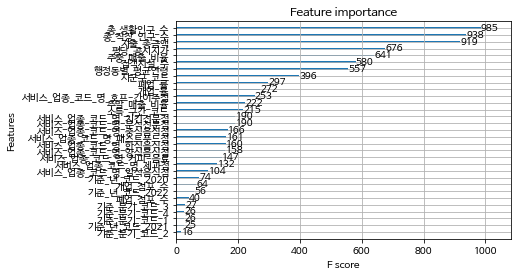

In [34]:
xgb.plot_importance(xgb_model)

# SHAP 모델로 TREE해석

In [35]:
import shap
shap.initjs()
explainer = shap.TreeExplainer(xgb_model)
shap_values = explainer.shap_values(X_train)

Glyph 8722 missing from current font.
Glyph 8722 missing from current font.


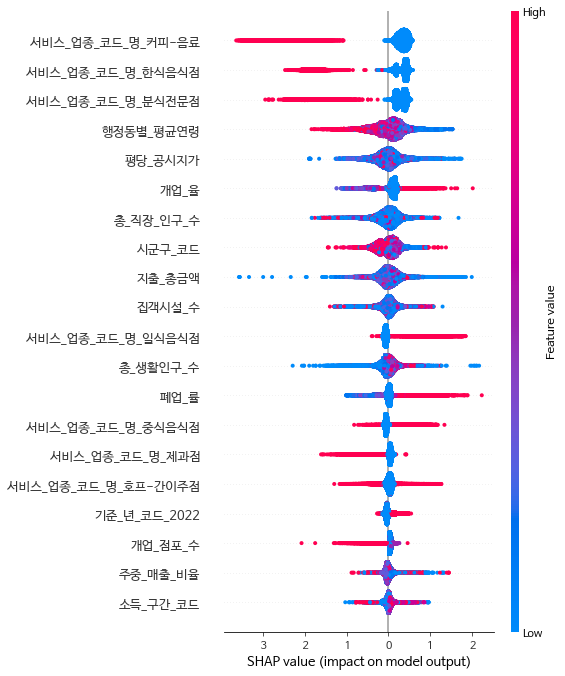

In [36]:
shap.summary_plot(shap_values, X_train)

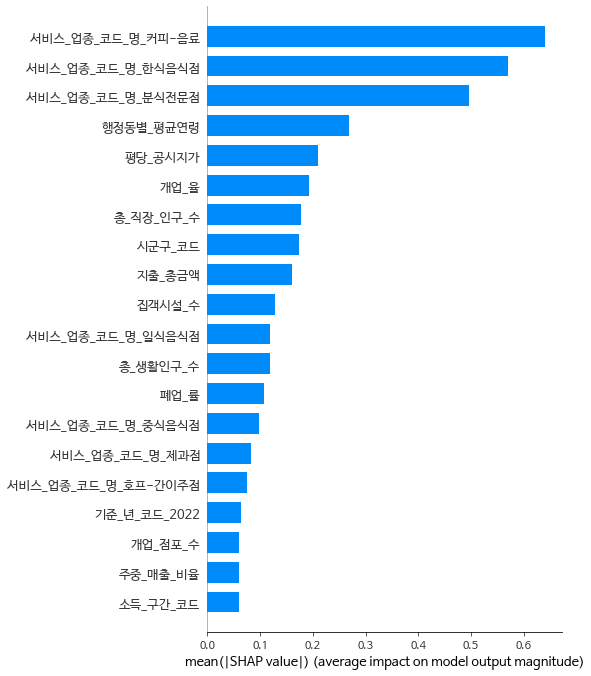

In [37]:
shap.summary_plot(shap_values, X_train, plot_type='bar')

In [38]:
shap_vals = explainer(X_train)

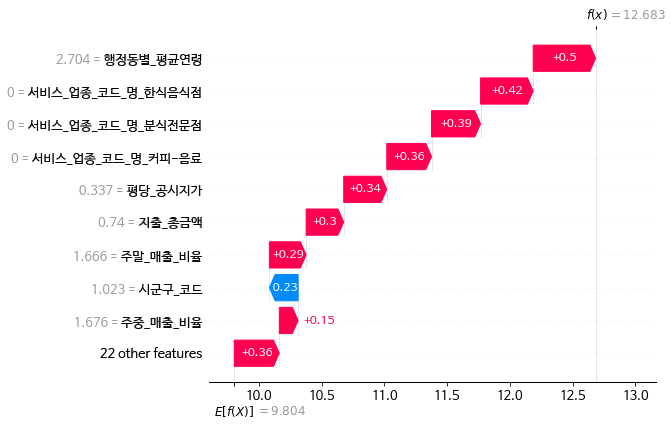

In [41]:
shap.plots.waterfall(shap_vals[0])

Glyph 8722 missing from current font.
Glyph 8722 missing from current font.


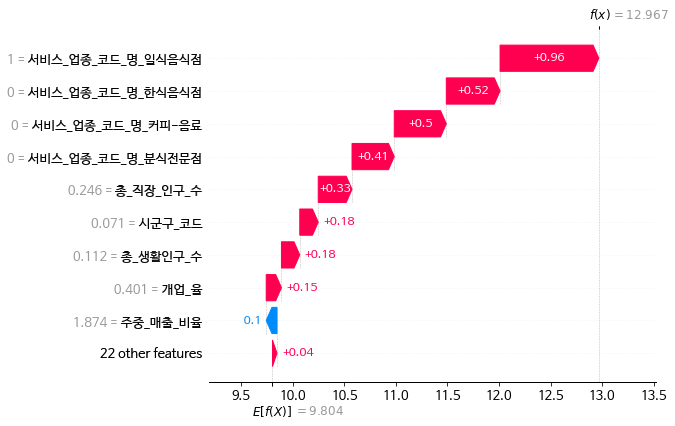

In [44]:
shap.plots.waterfall(shap_vals[1])

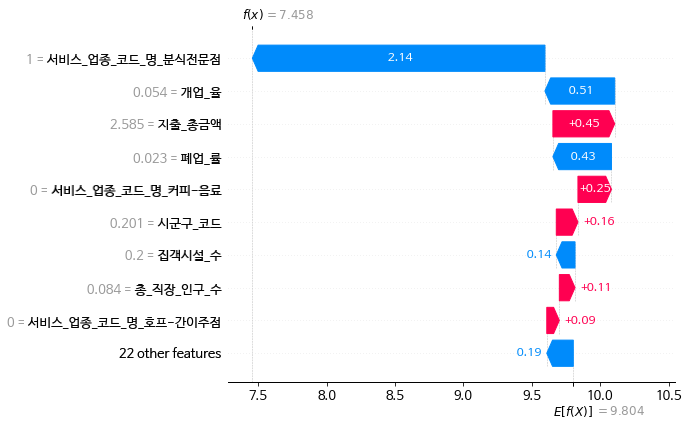

In [40]:
shap.plots.waterfall(shap_vals[2])

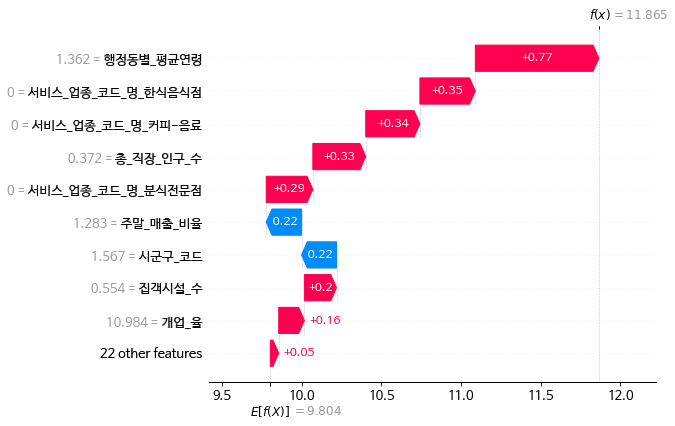

In [45]:
shap.plots.waterfall(shap_vals[4])

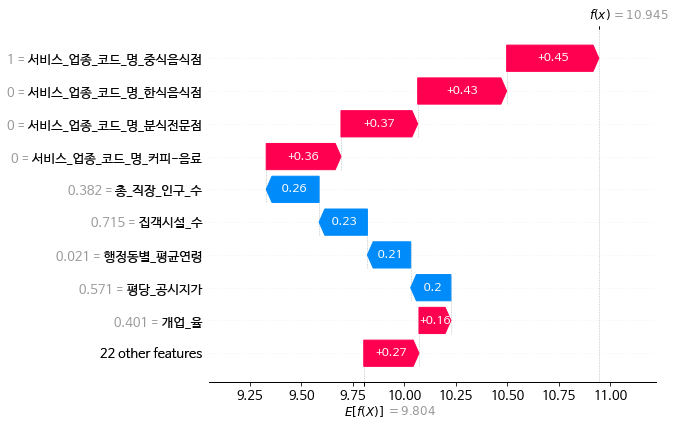

In [39]:
shap.plots.waterfall(shap_vals[3])

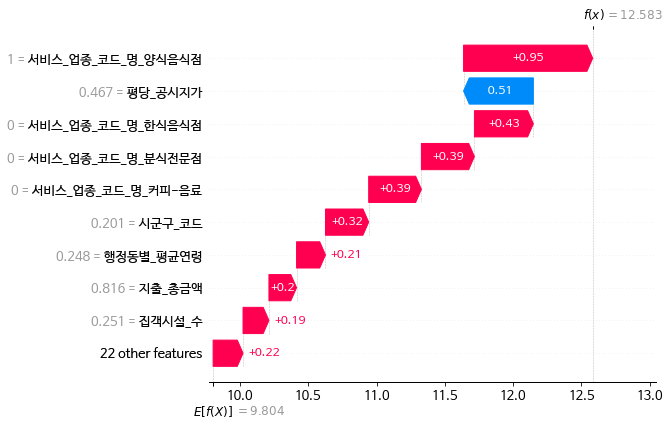

In [46]:
shap.plots.waterfall(shap_vals[5])

In [ ]:
# shap_interaction_values = explainer.shap_interaction_values(X_train)
# shap.summary_plot(shap_interaction_values, X_train)

# TODO:

상권의그룹화 시켜서 상권 클러스터링해서 상권코드명 대신 넣기 (원핫인코딩 말고)
